In [1]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from datasets import load_from_disk
import torch


In [27]:
from datasets import load_dataset
dataset = load_dataset('multi_news', split='train').shard(num_shards=40, index=0)

In [19]:
shard = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/processed_shards/shard_0")

In [14]:
model_name = "google/pegasus-multi_news"
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)

In [15]:
def generate_summary(document):
    result = []
    for text in document['document']:
        batch = tokenizer(''.join(text), truncation=True, padding="longest", return_tensors="pt").to(device)
        translated = model.generate(**batch)
        result.extend(tokenizer.batch_decode(translated, skip_special_tokens=True))
    document['pred'] = result
    return document

In [16]:
result = shard.select(range(3)).map(generate_summary)

  0%|          | 0/3 [00:00<?, ?ex/s]

/ext3/miniconda3/lib/python3.9/site-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 256 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [22]:
result['document'][0][1]

["Polls and race analysts suggest that only three of tonight's contests are considered competitive, all in states where incumbent Democratic governors aren't running again: Montana, New Hampshire and Washington.",
 'Three Republican governors, including Rick Scott of Florida and Scott Walker of Wisconsin, rejected a share of the money citing debt and deficit concerns.',
 "State-By-State View \n \n North Carolina: One-term incumbent Democratic Gov. Beverly Perdue, the first woman to hold the state's top office, announced in January that she would not seek re-election after polls showed her with high disapproval ratings and trailing Republican candidate Pat McCrory.",
 'McCrory lost a close race to Perdue in 2008, when then-presidential candidate Barack Obama became the first Democrat to win North Carolina in more than three decades.',
 'New Hampshire: Former Democratic state Sen. Maggie Hassan has also promised a continuation of the policies of her predecessor, retiring Democratic Gov. 

In [23]:
result[0]['pred'][1]

"– It's Election Day, which means it's time for you to chime in with your thoughts on who's going to be the next governor of Montana, New Hampshire, or Washington. Here's what you need to know: It's a dead heat: Democrat Jay Inslee and Tea Party favorite Ovide Lamontagne are in a dead heat in the race for governor of Washington, the state has been in Democratic hands for 32 years. It's a close race: Former Democratic state Sen. Maggie Hassan has promised a continuation of the policies of her predecessor, retiring Democratic Gov. John Lynch. Her opponent is lawyer Ovide Lamontagne, a Tea Party conservative who ran unsuccessfully for governor in 1996 and for the US Senate in 2010. Polls and race analysts suggest that only three of tonight's contests are considered competitive, all in states where incumbent Democratic governors aren't running again: Montana, New Hampshire, and Washington. Three Republican governors, including Rick Scott of Florida and Scott Walker of Wisconsin, rejected a

In [19]:
result[0]['summary']

'– It\'s a race for the governor\'s mansion in 11 states today, and the GOP could end the night at the helm of more than two-thirds of the 50 states. The GOP currently controls 29 of the country\'s top state offices; it\'s expected to keep the three Republican ones that are up for grabs (Utah, North Dakota, and Indiana), and wrest North Carolina from the Dems. That brings its toll to 30, with the potential to take three more, reports NPR. Races in Montana, New Hampshire, and Washington are still too close to call, and in all three, Democrat incumbents aren\'t seeking reelection. The results could have a big impact on health care, since a Supreme Court ruling grants states the ability to opt out of ObamaCare\'s Medicaid expansion. "A Romney victory would dramatically empower Republican governors," said one analyst. Click for NPR\'s state-by-state breakdown of what could happen.'

In [2]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)

In [3]:
from datasets import load_from_disk
pegasus_result= load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/pegasus_multi_news/shard_0")

In [18]:
# topic 1
pegasus_result['document'][0][0]

NameError: name 'pegasus_result' is not defined

In [95]:
# topic 2
pegasus_result['document'][21][1]

['After its acquisition of satellite television service DirecTV, telephone giant AT&T Inc. might be setting its sights on an even bigger prize, Time Warner Inc. \n \n Bloomberg News reported Thursday afternoon that AT&T and Time Warner executives have engaged in preliminary talks about a potential merger or other partnerships. \n \n ',
 'Such a combination would transform AT&T, based in Dallas, into a communications and entertainment colossus with multiple distribution outlets — including one of the nation’s largest mobile phone networks — and some of the most prestigious television channels in the business.',
 'Warner Bros. also has a rich library of characters, including DC Comics and such cartoon characters as Scooby-Doo and the Looney Tunes zoo, including Bugs Bunny and Sylvester the Cat. \n \n ',
 'In some ways, AT&T-Time Warner would resemble cable giant Comcast, which owns NBCUniversal — but AT&T would be even bigger with its mobile phone operations.',
 'AT&T already operates th

In [92]:
pegasus_result['pred'][21]

['– Takeover talks between AT&T and Time Warner are heating up, reports Bloomberg, citing "people familiar with the situation." Time Warner is currently valued at $65 billion, while AT&T is at $238 billion. The talks are said to be informal, and neither side has hired a financial adviser yet. Time Warner shares jumped 4.7% to $82.99 on news of the talks.',
 '– AT&T and Time Warner are in early talks about a possible merger that would create the biggest media company in America, reports Bloomberg, citing "people familiar with the matter." A deal between the two companies—which include HBO, CNN, and the Warner Bros. studio—would be one of the biggest in recent years, notes Reuters, but it\'s not clear whether a Donald Trump or Hillary Clinton administration would approve such a deal. The Los Angeles Times notes that AT&T has been working with an executive with "considerable chops in Hollywood" and that Time Warner has a "rich library of characters," including DC Comics and Looney Tunes c

In [93]:
pegasus_result['summary'][21]

'– A new communications behemoth may be emerging soon: Insiders tell Bloomberg that over the last few weeks, senior execs from AT&T and Time Warner have been discussing strategies including a possible merger. Reuters notes that telecom companies like AT&T have been making a "land grab" for media companies in recent years, and a merger would give AT&T assets including HBO, CNN, and Warner Bros. studios. The Los Angeles Times reports that Time Warner is valued at $65 billion and AT&T at $238 billion. A merger of the two would create an entity big enough to create major antitrust concerns, and it\'s not clear whether a Clinton or Trump administration would allow the deal. Time Warner shares jumped 4.7% after merger rumors surfaced Thursday, while AT&T shares fell 1.8%. (Verizon\'s deal to buy Yahoo has run into difficulties.)'

In [40]:
batch = tokenizer(dataset[0]['document'], truncation=True, padding="longest", return_tensors="pt").to(device)
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)

In [36]:
tgt_text

['– Two of the three suicide bombers who killed at least 44 people and wounded more than 300 in an attack Tuesday at Istanbul\'s airport have been identified, according to Turkey\'s state news agency. Vadim Osmanov and Rakim Bulgarov, both from Uzbekistan, have been identified as the attackers, Anadolu Agency said, without naming their nationalities. Vadim Osmanov was born in Kyrgyzstan, while Bulgarov is from Uzbekistan, CNN reports. They reportedly entered Turkey a month ago from Syria\'s ISIS stronghold of Raqqa. On Thursday, US Rep. Michael McCaul identified the organizer of the attack as Akhmed Chatayev, a Chechen who is "probably the No. 1 enemy in the Northern Caucasus region of Russia," he said. "He\'s traveled to Syria on many occasions and became one of the top lieutenants for the minister of war for ISIS operations." McCaul said Chatayev coordinated the attack with the three suicide bombers, who were armed with a bomb, a gun, and a bomb-making device. The chairman of the Hou

In [17]:
scorer.score(''.join(pegasus_result['pred'][0]),pegasus_result['summary'][0])

{'rouge1': Score(precision=0.475, recall=0.3140495867768595, fmeasure=0.3781094527363184),
 'rouge2': Score(precision=0.17721518987341772, recall=0.11666666666666667, fmeasure=0.14070351758793972),
 'rougeL': Score(precision=0.3375, recall=0.2231404958677686, fmeasure=0.26865671641791045)}

In [13]:
def get_rouge(document):
    pred = ''.join(document['pred'])
    summary = document['summary']
    score = scorer.score(pred,summary)
    document['rouge1'] = score['rouge1'][2]
    document['rouge2'] = score['rouge2'][2]
    document['rougeL'] = score['rougeL'][2]
    
    return document
    

In [14]:
get_rouge(pegasus_result[0])['rouge1']

0.28791773778920304

In [15]:
pegasus_rouge = pegasus_result.map(get_rouge)

  0%|          | 0/1125 [00:00<?, ?ex/s]

In [16]:
import numpy as np
print("rouge1: ", np.mean(pegasus_rouge['rouge1']))
print("rouge2: ", np.mean(pegasus_rouge['rouge2']))
print("rougeL: ", np.mean(pegasus_rouge['rougeL']))

rouge1:  0.4599544262002416
rouge2:  0.19828941876969666
rougeL:  0.22964175255326796


In [2]:
shard = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_clustered/shard_0")

In [6]:
len(shard[0]['document'])

5

In [11]:
import numpy as np
[np.mean(i) for i in shard[0]['clustered_scores']]

[0.029239766081871347,
 0.03483709273182957,
 0.04200779727095516,
 0.02538011695906433,
 0.033625730994152045]

In [13]:
shard[0]['document']

[['Just look at what happened when the Obama administration in 2010 offered federal stimulus money to states to begin building a high-speed rail network.',
  'Just look at what happened when the Obama administration in 2010 offered federal stimulus money to states to begin building a high-speed rail network.'],
 ["Polls and race analysts suggest that only three of tonight's contests are considered competitive, all in states where incumbent Democratic governors aren't running again: Montana, New Hampshire and Washington.",
  'Three Republican governors, including Rick Scott of Florida and Scott Walker of Wisconsin, rejected a share of the money citing debt and deficit concerns.',
  "State-By-State View \n \n North Carolina: One-term incumbent Democratic Gov. Beverly Perdue, the first woman to hold the state's top office, announced in January that she would not seek re-election after polls showed her with high disapproval ratings and trailing Republican candidate Pat McCrory.",
  'McCror

In [14]:
shard = load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_clustered/shard_0")

In [30]:
test = shard[3]

In [31]:
test['document']

[['The U.S. Census Bureau reported Wednesday that 16 million children living in America received food stamps in 2014, or about one out of every five kids.',
  'Census said that number is up dramatically from 2007, before the Great Recession, when 9 million kids were receiving food stamps, or about one in eight.',
  '“The rate of children living with married parents who receive food stamps has doubled since 2007,” Census said.',
  'The findings are likely to bolster claims from some Republicans that the Obama administration seems to have a goal of putting more people under government aid programs.',
  'While Democrats have tried to give President Barack Obama credit for a rebounding economy, they also note that millions of additional people are using food stamps, and that the program should not be cut yet.',
  'The total number of people using food stamps has almost doubled since the start of the Great Recession, to nearly 48 million in 2013.',
  'Republicans have tried since 2013 to cu

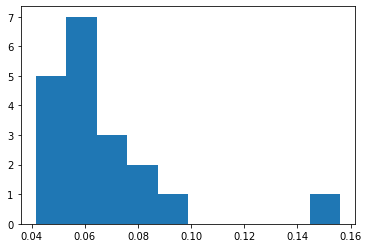

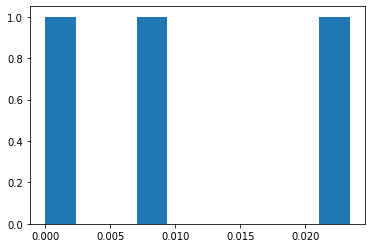

In [32]:
import matplotlib.pyplot as plt
for i in test['clustered_scores']:
    plt.hist(i)
    plt.show()